**OBJECTIVE** :To build a machine learning model that accurately classifies the emotion expressed in a given text input (e.g., a sentence, tweet, or comment) using a Support Vector Machine (SVM) classifier. The goal is to explore text processing, feature extraction using TF-IDF, and emotion classification in a scalable and interpretable way.

**Key Concepts Used:**
1. Natural Language Processing (NLP)
NLP is the field that focuses on the interaction between computers and human language.

In this project, text data (such as sentences or social media messages) is processed to extract meaningful features.

2. TF-IDF Vectorization (Term Frequency-Inverse Document Frequency)
Converts raw text into numerical feature vectors.

TF: Frequency of a word in a document.

IDF: How unique or rare that word is across all documents.

Result: A matrix where each row is a document and each column is a token (word), with weighted scores.

3. Support Vector Machine (SVM)
A supervised machine learning algorithm used for classification tasks.

It finds the optimal hyperplane that separates classes in the feature space.

We used a linear kernel, which is effective and interpretable for text data.

4. Data Splitting
The dataset is split into training and testing sets (e.g., 80/20 split) to evaluate model generalization.

5. Model Evaluation Metrics
Accuracy: Percentage of correctly predicted labels.

Precision, Recall, F1-score: Used to evaluate class-wise performance in imbalanced datasets.

Classification Report: Provides a detailed breakdown of model performance.

6. Visualization
2D Decision Boundary: Shows how the SVM classifier separates classes in 2D feature space.

3D Scatter Plot: Visualizes class distributions in a reduced 3D feature space (using synthetic or PCA-reduced data).

**Tools & Libraries Used:**
Python: Core language for implementation.

pandas: For data loading and manipulation.

scikit-learn (sklearn): For model training (SVM), TF-IDF vectorization, metrics, and synthetic data generation.

matplotlib & seaborn: For plotting and visualization.

NumPy: For numerical operations.

VS Code: IDE used for development.

Git & GitHub: For version control and project hosting

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import TruncatedSVD



**Loading Dataset and Preveiwing dataset**

loading the dataset and getting an idea about the structure of data also checking if thier is any coulmns with null values

In [2]:
# Load your dataset
df = pd.read_csv("emotions.csv")  # Make sure this file is in the same folder

# Preview dataset
print(df.head())
print("Null values:\n", df.isnull().sum())

                                                text  label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4
Null values:
 text     0
label    0
dtype: int64


Mentioning below the encoded numbers for particular emotion :

sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).

In this project, we built a text classification model using Support Vector Machines (SVM) to detect emotions from textual data. First, we extracted the text (X) and corresponding emotion labels (y) from our dataset. We then split the data into training and testing sets and converted the raw text into numerical features using TF-IDF vectorization. Since TF-IDF creates high-dimensional data, we applied TruncatedSVD to reduce dimensionality for faster and more efficient training. We trained a LinearSVC model on this processed data, made predictions on the test set, and evaluated the model's performance using accuracy and classification metrics. The overall goal was to enable the model to understand emotional context in text and classify it accurately into categories like happy, sad, angry, etc.

In [3]:
# Extract features and labels
X = df['text']       # Change if your column name is different
y = df['label']    # Change if your column name is different

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(max_features=2000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the SVM classifier
#svm_model = SVC(kernel='linear', C=1.0)
svd = TruncatedSVD(n_components=300)
svm_model = LinearSVC(C=1.0, max_iter=5000)
svm_model.fit(X_train_vec, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_vec)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8959118063386196

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     24201
           1       0.90      0.93      0.92     28164
           2       0.81      0.79      0.80      6929
           3       0.90      0.89      0.90     11441
           4       0.85      0.84      0.85      9594
           5       0.78      0.72      0.74      3033

    accuracy                           0.90     83362
   macro avg       0.86      0.85      0.86     83362
weighted avg       0.90      0.90      0.90     83362



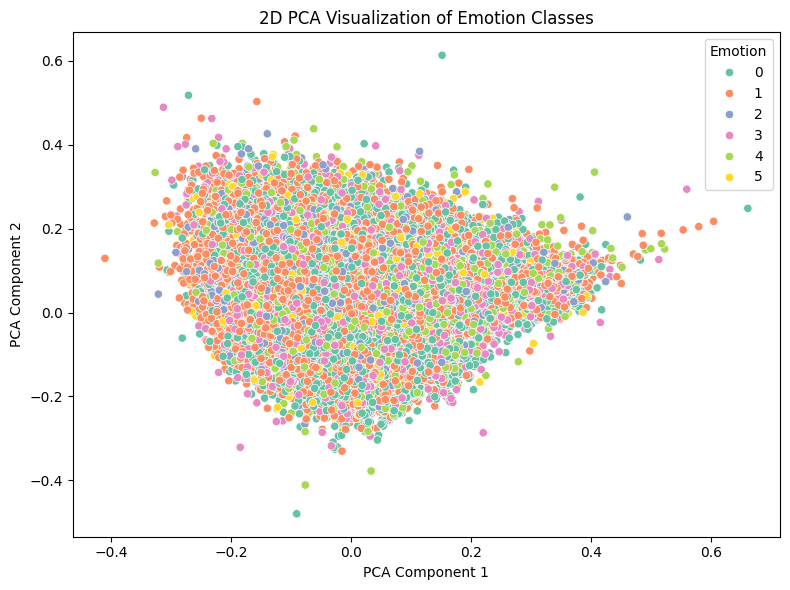

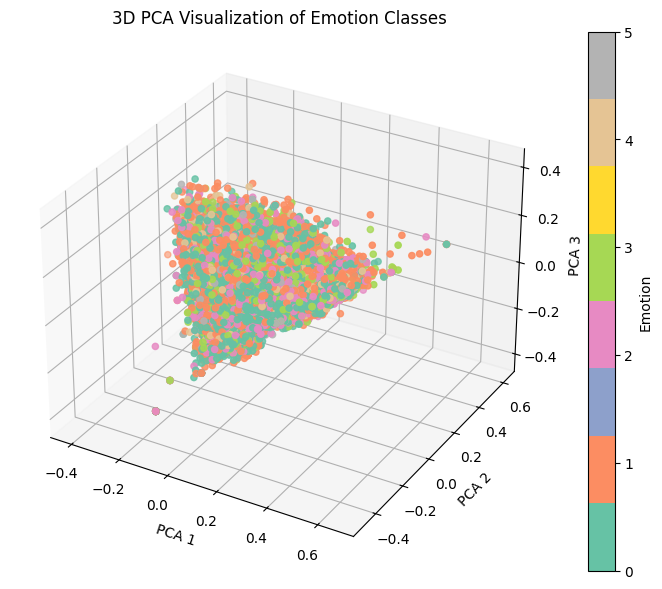

In [ ]:
# ------------------------------
#  2D PCA Plot
# ------------------------------
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_train_vec.toarray())

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=y_train, palette='Set2')
plt.title("2D PCA Visualization of Emotion Classes")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Emotion')
plt.tight_layout()
plt.show()

# ------------------------------
# 3D PCA Plot
# ------------------------------
pca_3d = PCA(n_components=3)
X_3d = pca_3d.fit_transform(X_train_vec.toarray())

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=pd.factorize(y_train)[0], cmap='Set2')
ax.set_title("3D PCA Visualization of Emotion Classes")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.colorbar(scatter, label='Emotion')
plt.show()

**Decision Boundary**:

A decision boundary is a line or a surface that separates different classes in a classification problem. It's essentially the boundary that a machine learning model (like SVM) uses to decide which class a new data point belongs to.

Here we select best two features and on the basis of a 2D plot, where each point is a data sample with two features (e.g., height and weight but in our case its emotions). Based on the training data, your model tries to find the best line (in 2D) or hyperplane (in higher dimensions) that separates the different classes.

In multiclass classification, the decision boundary could consist of several lines or surfaces, each one separating different classes.

**How the Decision Boundary Works in SVM:**
In Support Vector Machines (SVM):

Linear SVM: The decision boundary is a straight line (in 2D) or a hyperplane (in higher dimensions) that separates the data points of different classes.

Non-linear SVM: The decision boundary can be a more complex curve (in 2D) or surface (in higher dimensions), achieved by using kernel functions (e.g., radial basis function).

In Code:
When plotting a decision boundary in 2D, we use a grid of points, predict the class for each, and color the plot based on the class predicted for each point. The area with the most frequent class represents the region where new data points would be classified.

**Why Decision Boundaries Are Important:**
Interpretability: Visualizing decision boundaries helps us understand how a model makes decisions.

Model Performance: A well-positioned decision boundary means the model is distinguishing between classes efficiently.

Model Complexity: A complex boundary (like in non-linear SVMs) might indicate that the model is overfitting.



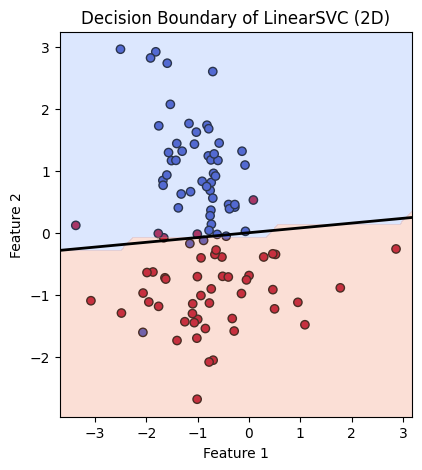

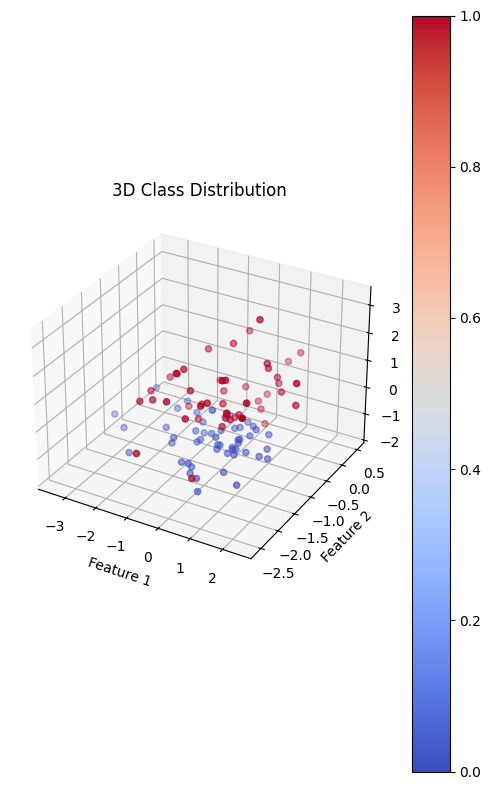

In [9]:
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1)

# Train Linear SVM
clf = LinearSVC()
clf.fit(X, y)

# Plotting the decision boundary
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

# Plot decision boundary manually using coef_ and intercept_
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
plt.contour(XX, YY, Z, levels=[0], linewidths=2, colors='black')
plt.contourf(XX, YY, Z > 0, alpha=0.3, cmap=plt.cm.coolwarm)

plt.title("Decision Boundary of LinearSVC (2D)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# =====================
# 2. 3D Class Distribution Plot
# =====================

# Generate 3D data
X3, y3 = make_classification(n_samples=100, n_features=3, n_classes=2, n_redundant=0, n_clusters_per_class=1)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(122, projection='3d')
scatter = ax.scatter(X3[:, 0], X3[:, 1], X3[:, 2], c=y3, cmap=plt.cm.coolwarm)
ax.set_title('3D Class Distribution')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.colorbar(scatter)

# =====================
# Show plots
# =====================

plt.tight_layout()
plt.show()

This project demonstrates how machine learning, especially SVMs, can be applied to a real-world NLP problem. It combines data preprocessing, feature extraction, and model training in a clean, modular pipeline. It’s scalable to other tasks like sentiment analysis, spam detection, or topic classification.